In [1]:
import numpy as np
import numpy.random as rn
import random, operator
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
def f1_vec(city):
    a = city[0]
    b = city[1]
    return a**2 + b**2 + 1


#function that models the problem
target = 1
def f1(position):
    return position[0]**2 + position[1]**2 + 1



# def f1_vec(city):
#     a = city[0]
#     b = city[1]
    
#     A = 10
#     f = 0
    
#     f = f + a**2 + b**2 - A*np.cos(2*np.pi*a) - A*np.cos(2*np.pi*b)
    
# #     for j in range(2):
# #         f = f + position[j]**2 - A*np.cos(2*np.pi*position[j])
#     return A*2 + f

# #function that models the problem
# target = 0
# def f1(position):
#     A = 10
#     f = 0
#     for j in range(2):
#         f = f + position[j]**2 - A*np.cos(2*np.pi*position[j])
#     return A*2 + f

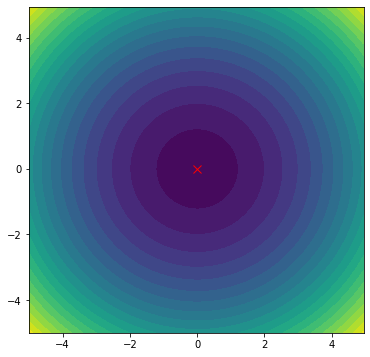

fitness: 1


In [3]:
delta = .05
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = f1([X,Y])

fig, ax = plt.subplots(figsize=(6,6))
cmap = cm.get_cmap(name='terrain', lut=None)
# cmap = cm.get_cmap(name='rainbow', lut=None)
cmap = cm.get_cmap(name='viridis', lut=None)

CS = ax.contourf(X, Y, Z1, 19, cmap=cmap)

plt.plot(0,0, 'rx', markersize=8)

plt.show()

print('fitness:',f1([0,0]))

In [158]:
# set individuals as the mean of two disctinct points in X and Y and encode they using binary selection
def create_individual(x_index, y_index, max_choice_x_values, max_choice_y_values, num_numbers):
#     indx = np.zeros(max_choice_x_values, dtype=int)
#     indy = np.zeros(max_choice_y_values, dtype=int)
    
#     reduced_x_index = x_index

    points_x = random.sample(list(x_index), num_numbers)
    points_y = random.sample(list(y_index), num_numbers)

#     indx[points_x] = 1
#     indy[points_y] = 1

    indvidual = [points_x, points_y]
    
    return indvidual



# decode individual
def decode_individual(individual):
 
    individual_x_values = x_values[individual[0]]
    individual_y_values = y_values[individual[1]]
    
    return [individual_x_values, individual_y_values]



def decode_population(population):
    
    pop_x_values = x_values[population[:,0]]
    pop_y_values = y_values[population[:,1]]
    
    return [pop_x_values, pop_y_values]



# define fitness value for the problem
class Fitness:
    
    def __init__(self, individual, population):
        self.individual = individual
        self.population = population
        self.fitness = 0.0
        self.fitness_pop = 0.0
    
    
#     def eval_fitness_ind(self):
#         [x_val, y_val] = decode_individual(self.individual)
        
#         x_mean = np.mean(x_val)
#         y_mean = np.mean(y_val)
                
# #         self.fitness = 1 / f1([x_mean, y_mean])
#         self.fitness = f1([x_mean, y_mean])
        
#         return self.fitness
    
    
#     def eval_fitness_mini_pop(self):
#         [x_val, y_val] = self.individual
        
# #         self.fitness_pop = np.sum(f1_vec(np.array([x_val[:], y_val[:]])))
#         self.fitness_pop = np.min(f1_vec(np.array([x_val[:], y_val[:]])))
                
#         return self.fitness_pop

    def eval_fitness_pop(self):
        
        [x_val, y_val] = decode_population(population)
        
        self.fitness_pop = np.amin(f1_vec(np.array([x_val[:], y_val[:]])),axis=1)
                
        return self.fitness_pop
    

# eval function for every individual and sort the best solution
def rank_solutions(population):
#     fitnessResults1 = {}
    
    individual_list = []
#     for index, ind in population.items():
    for index, ind in enumerate(population):
#         print('individual', ind)
        individual_list.append(index)
#         fitnessResults1[index] = Fitness(decode_individual(ind), population).eval_fitness_mini_pop()
    
    fitness2 = Fitness(ind, population).eval_fitness_pop()
    fitnessResults2 = dict(zip(individual_list, fitness2))
    
#     sorted_res1 = sorted(fitnessResults1.items(), key = operator.itemgetter(1), reverse = False)
    sorted_res2 = sorted(fitnessResults2.items(), key = operator.itemgetter(1), reverse = False)
    
#     sorted_res1 = sorted(fitnessResults1.items(), key = operator.itemgetter(0), reverse = False)
#     sorted_res2 = sorted(fitnessResults2.items(), key = operator.itemgetter(0), reverse = False)
    
    
#     return sorted_res1, sorted_res2
    return sorted_res2



def selection(pop_ranked, eliteSize):    
    selectionResults = []
    
    df = pd.DataFrame(np.array(pop_ranked), columns=["Index","Fitness"])

    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()


    for i in range(0, eliteSize):
        selectionResults.append(pop_ranked[i][0])
#         print('pop_ranked[i]', pop_ranked[i])
#         print('pop_ranked[i][0]', pop_ranked[i][0])

    for i in range(0, len(pop_ranked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(pop_ranked)):
            if pick <= df.iat[i,3]:
    #             print(pick)
                selectionResults.append(np.array(pop_ranked[i][0]))
                break

            
    return selectionResults



def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool



def breed(parent1, parent2, num_numbers):
    random_pair_x = random.sample(list(np.arange(num_numbers)),num_numbers)
    childx = np.array((np.array(parent1[0]) + np.array(parent2[0])[random_pair_x]) / 2, dtype=int)

    random_pair_y = random.sample(list(np.arange(num_numbers)),num_numbers)
    childy = np.array((np.array(parent1[1]) + np.array(parent2[1])[random_pair_y]) / 2, dtype=int)

    child = np.array([list(childx), list(childy)])

    return child



def crossover_population(matingpool, eliteSize, num_numbers):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])

    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1], num_numbers)
        children.append(child)
    
    return children



def mutate(individual, mutationRate):
    for swapped in range(np.shape(individual)[1]):
        if(random.random() < mutationRate):
#             swapWith = int(random.random() * 2)
#             swapWith = random.choice(x_values)
            swapWith = random.choice(x_index)
            
            individual[0][swapped] = swapWith
    
        if(random.random() < mutationRate):
#             swapWith = int(random.random() * 2)
#             swapWith = random.choice(y_values)
            swapWith = random.choice(y_index)

            individual[1][swapped] = swapWith
    
    return individual



def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop



def nextGeneration(currentGen, eliteSize, mutationRate, num_numbers):
#     print('\ncurrentGen\n', currentGen)
    
#     pop_ranked = rank_solutions(population)
    pop_ranked = rank_solutions(currentGen)
#     print('\npop_ranked\n', pop_ranked)
    
    selectionResults = selection(pop_ranked, eliteSize)
#     print('\nselectionResults\n', selectionResults)
    
    matingpool = matingPool(currentGen, selectionResults)
#     print('\nmatingpool\n', matingpool)
    
    children = crossover_population(matingpool, eliteSize, num_numbers)
#     print('\nchildren\n', children)
    
    nextGeneration = mutatePopulation(children, mutationRate)
#     print('\nnextGeneration\n', nextGeneration)
    
    return np.array(nextGeneration), pop_ranked


def reduce_index(max_choice_x_values, fraction_choose = 2):
    inf_ind = list(np.arange(0,int(max_choice_x_values/fraction_choose)))
    sup_ind = list(np.arange(int((fraction_choose-1)*max_choice_x_values/fraction_choose), max_choice_x_values))
    
    return inf_ind + sup_ind

In [255]:
random.seed(20)

# generate possible genes
xinf = -80
xsup = 80
yinf = -80
ysup = 80

ref = .01

# create a population
population_size = 20

mutationRate = 0.0

eliteSize=5

generations=50

num_numbers = 8

x_values = np.arange(xinf,xsup+ref,ref)
y_values = np.arange(yinf,ysup+ref,ref)
# print(x_values)
# print(y_values)

max_choice_x_values = len(x_values)
max_choice_y_values = len(y_values)

x_index = list(np.arange(0,max_choice_x_values))
y_index = list(np.arange(0,max_choice_y_values))
# print(x_index)
# print(y_index)

x_index = reduce_index(max_choice_x_values, 4)
y_index = reduce_index(max_choice_y_values, 4)
# print('reduced x index', x_index)
# print('reduced y index', y_index)

# print('reduced x values', x_values[x_index])
# print('reduced y values', y_values[y_index])



n_islands = 8

tol = 1.05

islands = np.arange(0,n_islands,1)
islands


pop_sim = {}
results_sim = {}

for simulation in islands:
    
    
    population = []

    for i in range(population_size):
    #     population.append(create_individual(x_values, y_values, max_choice_x_values, max_choice_y_values, num_numbers))
        population.append(create_individual(x_index, y_index, max_choice_x_values, max_choice_y_values, num_numbers))
    #     print(population[i])
    #     print(decode_individual(population[i]))

    # print()
    # print(population)
    population = np.array(population)#[:,1]
    # print(population)

    xx, yy = decode_population(population)

    xx[:], yy[:]
    initial_population = population.copy()
    

    results = []

    results.append(rank_solutions(population)[0][1])
    results

    for i in range(0, generations):
        population, pop_ranked = nextGeneration(population, eliteSize, mutationRate, num_numbers)

        results.append(pop_ranked[0][1])

        if pop_ranked[0][1] <= tol:
            break

    # results
    
    pop_sim[simulation] = population
    
    results_sim[simulation] = results

    

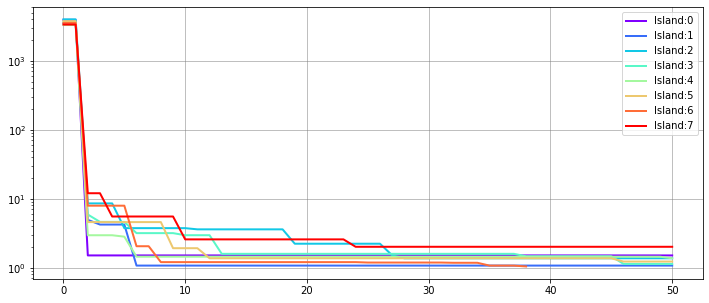

In [256]:
scale = "log"

fig, ax = plt.subplots(figsize=(12,5))

color = iter(cm.rainbow(np.linspace(0,1,n_islands)))
# color = iter(cm.viridis(np.linspace(0,1,n_islands)))

for simulation in islands:
    
    c = next(color)    
    ax.plot(results_sim.get(simulation), c = c, lw=2.0, label='Island:'+str(simulation))

ax.legend()

plt.yscale(scale)
# plt.xscale(scale)
plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.5)
plt.show()

In [238]:
results_sim

{0: [4128.32970000458,
  4128.32970000458,
  46.75039999938542,
  7.0579999999750935,
  7.0579999999750935,
  6.930000000256542,
  6.930000000256542,
  6.930000000256542,
  2.0705000000264704,
  1.6813000000866443,
  1.6813000000866443,
  1.6813000000866443,
  1.1481000000418973,
  1.1481000000418973,
  1.0583999999738662,
  1.0583999999738662,
  1.0583999999738662,
  1.0583999999738662,
  1.0583999999738662,
  1.0144000000098372],
 1: [3733.222500010887,
  3733.222500010887,
  15.991999999825437,
  15.991999999825437,
  15.991999999825437,
  15.991999999825437,
  7.698499999897987,
  7.004999999801507,
  7.004999999801507,
  7.004999999801507,
  7.004999999801507,
  1.2740999999421638,
  1.2740999999421638,
  1.2740999999421638,
  1.2740999999421638,
  1.2740999999421638,
  1.2740999999421638,
  1.2740999999421638,
  1.2740999999421638,
  1.2740999999421638,
  1.2740999999421638,
  1.2740999999421638,
  1.2740999999421638,
  1.2740999999421638,
  1.2740999999421638,
  1.27409999994216